In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from scipy import integrate
import matplotlib.pyplot as plt
import scipy


import sys
sys.path.append('pk_multi_tracer/')
sys.path.append('Library/')

#import functions 
from WS_cosmo import *
from useful_funcs import *

# Import the plot style settings
%run Library/plot_style          #import Library.plot_style#    comment out it latex errors for plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size='22')

# compute cosmology with class

In [2]:
#import and define cosmlogy in class
from classy import Class

#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 10 #UNITS: 1/Mpc # is also set to 10 later
params = {'output':'mPk,mTk',
             'non linear':'halofit',
             'Omega_b':Omega_b,
             'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
             'h':h,
             'n_s':n_s,
             'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
             'P_k_max_1/Mpc':k_max,
             'z_max_pk':10. #Default value is 10
}

#Initialize the cosmology and compute everything
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# So we need to also define survey specific parameters like biases

In [3]:
#load in preset surveys 
survey_params = SurveyParams(cosmo)
Euclid_dict = survey_params.get_surveybias('Euclid')
BGS_dict = survey_params.get_surveybias('BGS')
SKAO1_dict = survey_params.get_surveybias('SKAO1')
SKAO2_dict = survey_params.get_surveybias('SKAO2')
DM_dict = survey_params.get_surveybias('DM') # just for dark matter particles 

#in which we define linear_bias, survey redshifts,evolution and magnification bias as well as number density and f_sky
#print(Euclid_dict)

# second order bias and tidal bias are define wrt to b_1


These expressions then can just be edited by editing the dictionaries

## Import expression for each contributions

In [43]:
from Pk_0 import *     # zeroth order WS terms
from Pk_WS import *   # wide separation terms
from Pk_WSGR import *  # wide-separation/relavistic terms

### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [44]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)

The functions are slightly different to bispectrum functions as now only k dependent stuff is computed beforehand while everything else is taken in the function from the cosmo_functions object

### functions have this format
- WA.l1(params,cosmo_functions,zz,t=0)
- RR.l1(params,cosmo_functions,zz,t=0)
- GR.l1(params,cosmo_functions,zz)



In [64]:
print(cosmo_functions.survey.gr1(0.5))
print(cosmo_functions.survey1.gr1(0.5))

-0.0016504280931870622
-0.0016504280931870622


### now all parameters we need are computable from cosmo_functions - lets look at an example plots

In [45]:
zz=1 # redshift
kk = np.linspace(0.01,0.1)

In [46]:
#then we can access the terms we need which are returned as a list (they dont need to be unpacked!)
params = cosmo_functions.get_params_pk(kk,zz)#base set of parameters

Text(0, 0.5, '$ P_0(k) $')

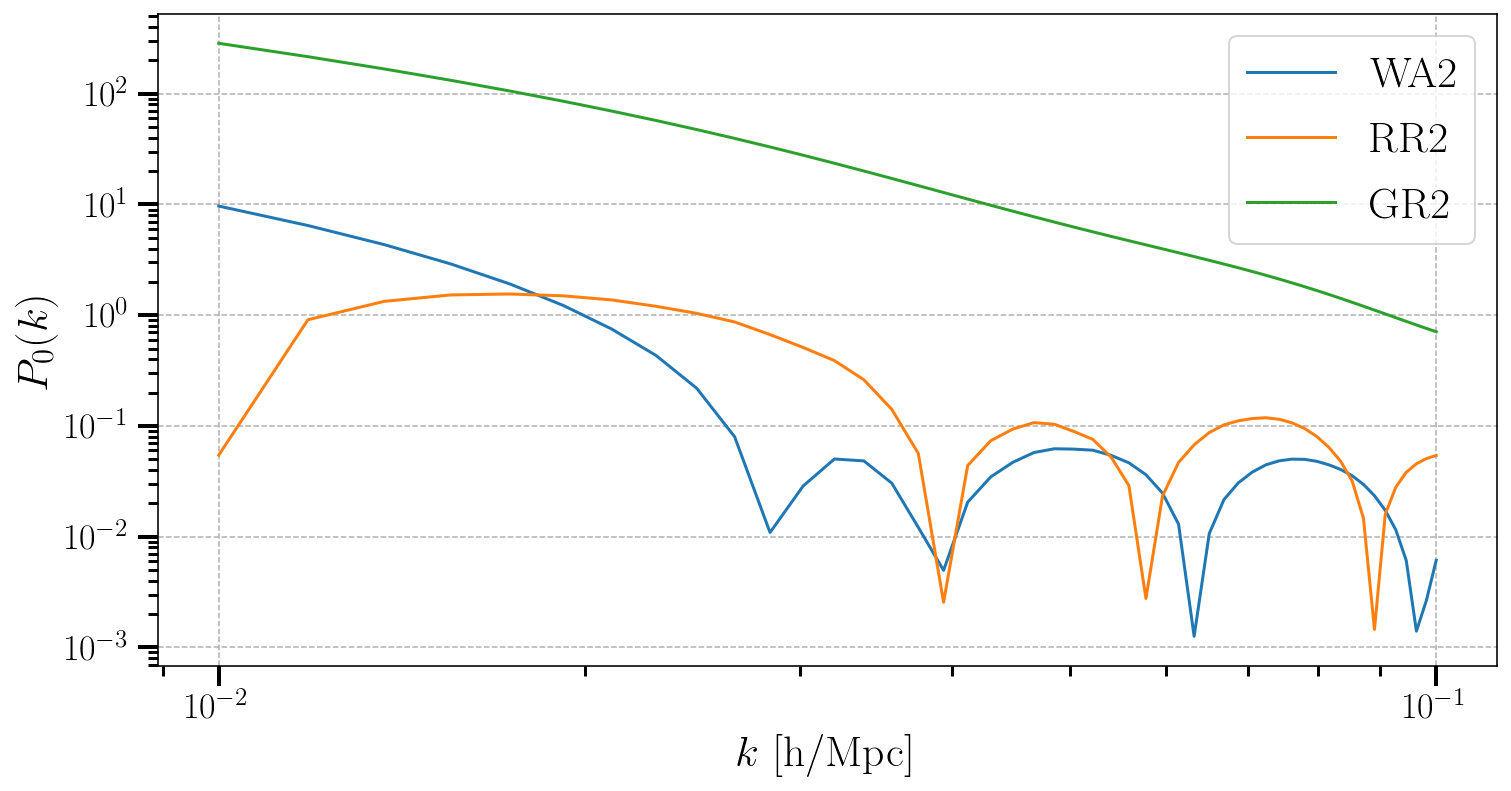

In [80]:
#say for monopole
plt.figure(figsize=(12,6))

#plt.plot(kk,np.abs(Pk0.l0(params,cosmo_functions,zz)),label='N')

plt.plot(kk,np.abs(WA2.l0(params,cosmo_functions,zz,t=0).real),label='WA2')
plt.plot(kk,np.abs(RR2.l0(params,cosmo_functions,zz,t=0).real),label='RR2')
plt.plot(kk,np.abs(GR2.l0(params,cosmo_functions,zz,t=0).real),label='GR2')
#plt.plot(kk,(WAGR.l0(params,cosmo_functions,zz,t=0).real),'--',label='WAGR')
#plt.plot(kk,(RRGR.l0(params,cosmo_functions,zz,t=0).real),'--',label='RRGR')
#plt.plot(kk,np.abs(WARR.l0(params,cosmo_functions,zz,t=0).real),'--',label='WARR')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

Text(0, 0.5, '$ P_0(k) $')

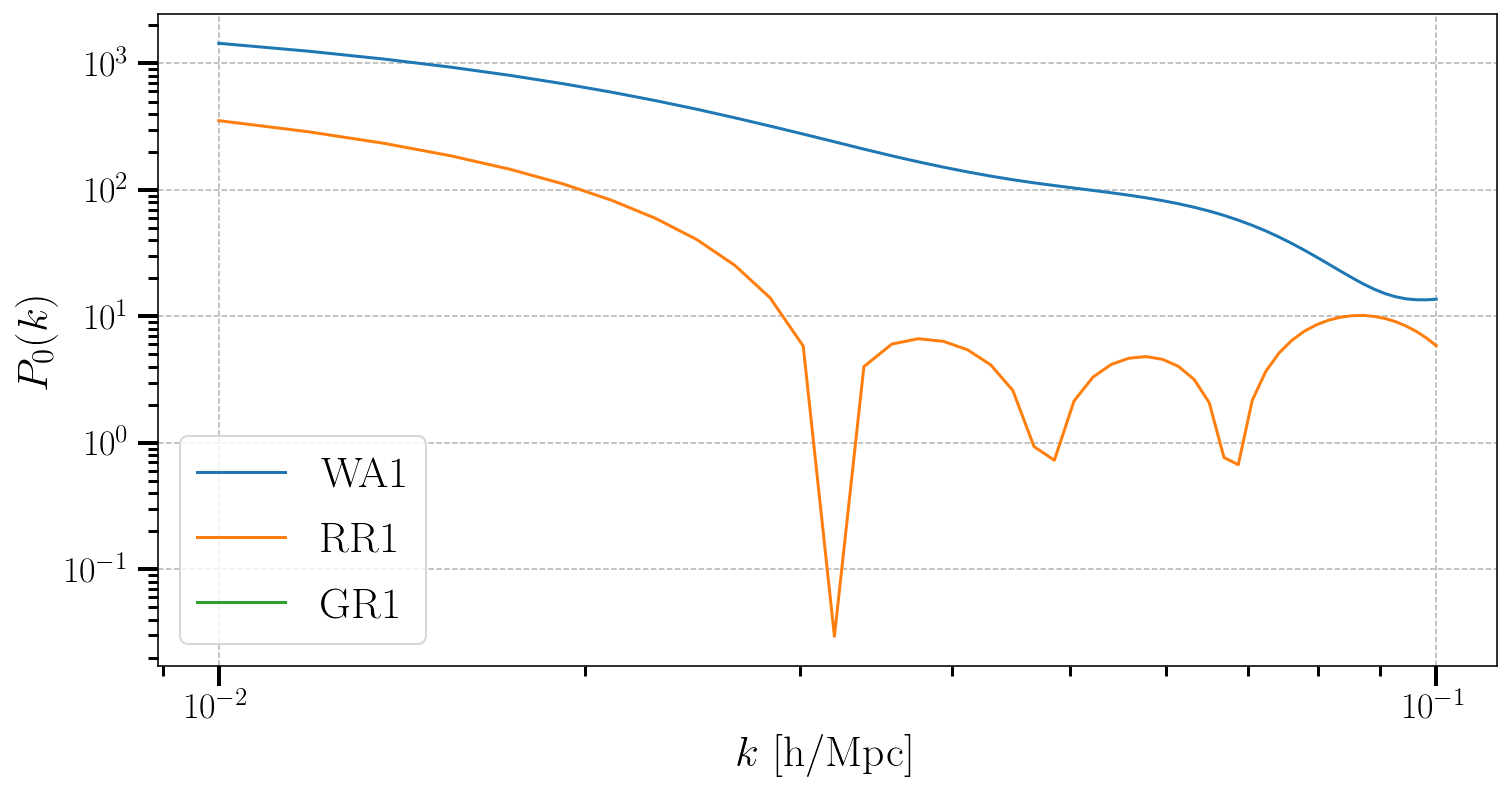

In [83]:
# for dipole
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(WA1.l1(params,cosmo_functions,zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(RR1.l1(params,cosmo_functions,zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(GR1.l1(params,cosmo_functions,zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

## Or we can consider the multi-tracer case 

In [86]:
#we now assing different survey parameters to survey_params1
cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict,survey_params1=SKAO2_dict)

Text(0, 0.5, '$ P_0(k) $')

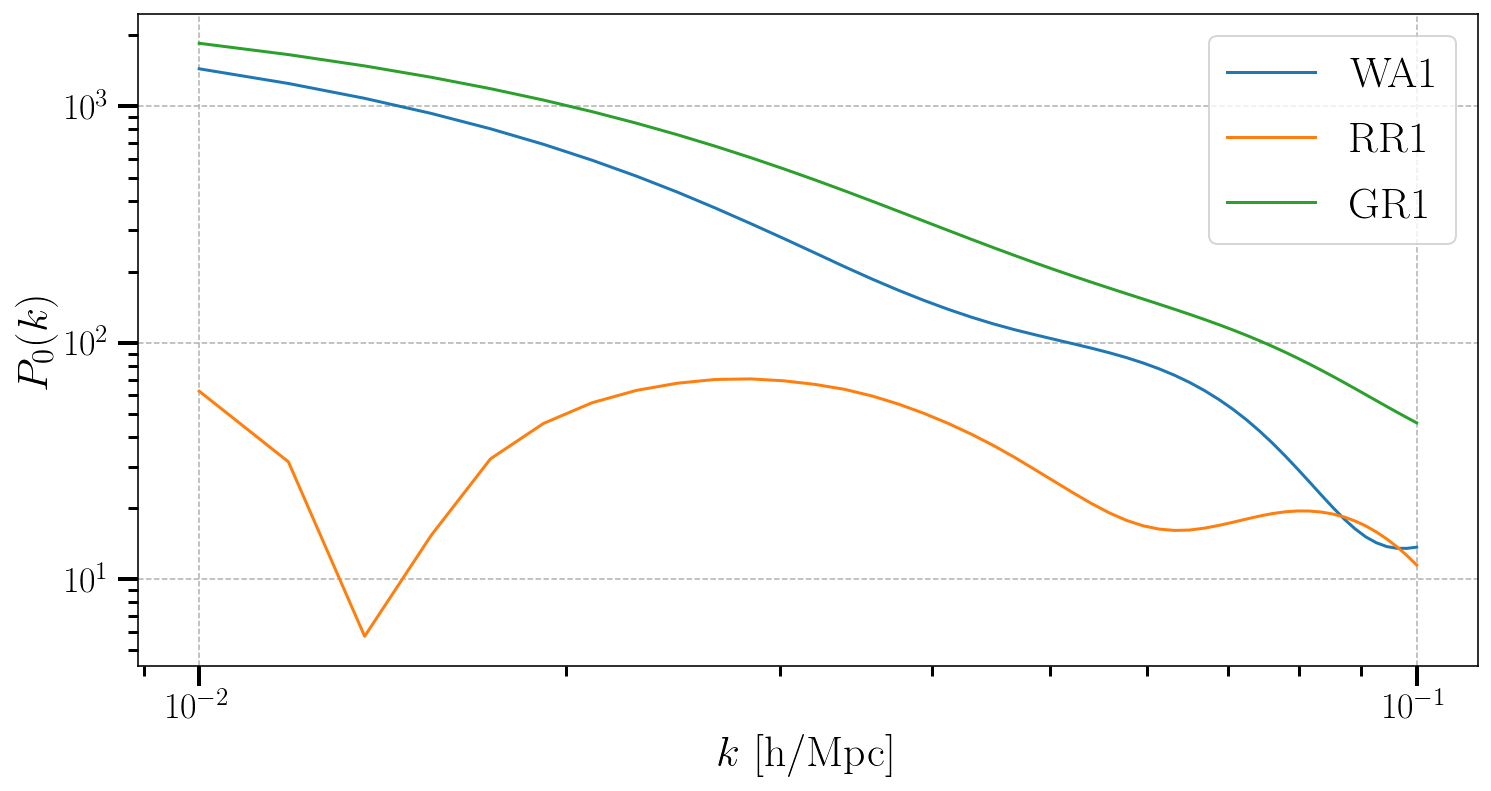

In [87]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(WA1.l1(params,cosmo_functions,zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(RR1.l1(params,cosmo_functions,zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(GR1.l1(params,cosmo_functions,zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

In [88]:
#creating composite functions is also useful
class WA_RR:#for all wide separation
    def l0(params,derivs,r,s):
        return WA2.l0(params,r,s)+WARR.l0(params,derivs,r,s)+RR2.l0(params,derivs,r,s)
    
    def l1(params,derivs,r,s):
        return WA1.l1(params,r,s) + RR1.l1(params,derivs,r,s)
    
    def l2(params,derivs,r,s):
        return WA2.l2(params,r,s)+WARR.l2(params,derivs,r,s)+RR2.l2(params,derivs,r,s)
    
class WA_RR_GR:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+GR2.l0(params,betas)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l1(params,derivs,betas,r,s):
        return WA1.l1(params,r,s) +RR1.l1(params,derivs,r,s)+GR1.l1(params,betas)
    
    def l2(params,derivs,betas,r,s):
        return WA2.l2(params,r,s) +RR2.l2(params,derivs,r,s)+GR2.l2(params,betas)+WAGR.l2(params,betas,r,s)+WARR.l2(params,derivs,r,s)+RRGR.l2(params,derivs,betas,r,s)
